<a href="https://colab.research.google.com/github/VasquezSRE/machinelearning-gtc/blob/main/algorithms/3_Gradient_Boosting_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
import sys; sys.path.append('./Utils')
from utils import Utils

In [ ]:
ut = Utils()
X, Y = ut.get_matrixes()

In [ ]:
def experimentar_gbt(num_trees, X, Y):
    """funcion que realiza experimentos de arboles de decision
    num_trees: list[int] lista con el número de arboles usado para el RF
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - numero de arboles usados
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        f1 = [] 
        gmean =[]
        
        for train, test in skf.split(X, Y):
            Xtrain, Ytrain, Xtest, Ytest = ut.get_training_test(X=X, Y=Y, train=train, test=test)
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo= GradientBoostingClassifier(n_estimators=trees)
            modelo.fit(Xtrain, Ytrain)
            f1_score_current, gmean_current, eficiencia_train_current, eficiencia_test_current = ut.get_metrics(model=modelo, X_train=Xtrain, X_test=Xtest, y_train=Ytrain, Ytest=Ytest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(eficiencia_train_current)
            EficienciaVal.append(eficiencia_test_current)
            gmean.append(gmean_current)           
            f1.append(f1_score_current)

        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'F1 Score'] = np.mean(f1)
        resultados.loc[idx,'F1 Score IC'] = np.std(f1)
        resultados.loc[idx,'GMEAN'] = np.mean(gmean)
        resultados.loc[idx,'GMEAN IC'] = np.std(gmean)
        resultados.loc[idx,'Eficiencia Train'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'Eficiencia Train IC'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'eficiencia prueba IC'] = np.std(EficienciaVal)
        idx= idx +1
        
    return (resultados)

In [ ]:
arboles = [5,10,20,50,100, 150]
resultados_gbt = experimentar_gbt(arboles, X, Y)
resultados_gbt

,número de arboles,F1 Score,F1 Score IC,GMEAN,GMEAN IC,Eficiencia Train,Eficiencia Train IC,eficiencia de prueba,eficiencia prueba IC
0,5.0,0.880233,0.039418,0.910787,0.027486,0.922525,0.010486,0.881771,0.036201
1,10.0,0.897238,0.042164,0.923913,0.029089,0.935751,0.008328,0.899092,0.038368
2,20.0,0.910583,0.044135,0.934270,0.030432,0.956362,0.006125,0.912787,0.040179
3,50.0,0.920951,0.045907,0.942184,0.031696,0.977980,0.003606,0.923262,0.041904
4,100.0,0.927685,0.047283,0.947353,0.032644,0.993891,0.002578,0.930111,0.043189
5,150.0,0.930663,0.047316,0.949633,0.032578,0.997113,0.001734,0.933132,0.043109


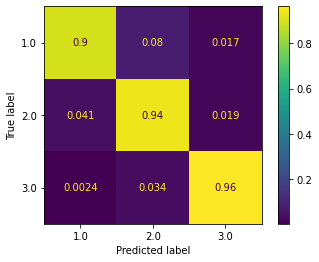

In [ ]:
X_train, X_test, y_train, y_test = ut.get_train_test()
clf = GradientBoostingClassifier(n_estimators=20)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf,X=X_test, y_true=y_test,normalize='true')

In [ ]:
resultados_gbt

,número de arboles,F1 Score,F1 Score IC,GMEAN,GMEAN IC,Eficiencia Train,Eficiencia Train IC,eficiencia de prueba,eficiencia prueba IC
0,5.0,0.880233,0.039418,0.910787,0.027486,0.922525,0.010486,0.881771,0.036201
1,10.0,0.897238,0.042164,0.923913,0.029089,0.935751,0.008328,0.899092,0.038368
2,20.0,0.910583,0.044135,0.934270,0.030432,0.956362,0.006125,0.912787,0.040179
3,50.0,0.920951,0.045907,0.942184,0.031696,0.977980,0.003606,0.923262,0.041904
4,100.0,0.927685,0.047283,0.947353,0.032644,0.993891,0.002578,0.930111,0.043189
5,150.0,0.930663,0.047316,0.949633,0.032578,0.997113,0.001734,0.933132,0.043109


In [ ]:
X.shape

(4965, 22)

In [ ]:
X_train, X_test, y_train, y_test = ut.get_train_test()
clf = GradientBoostingClassifier(n_estimators=50)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf,X=X_test, y_true=y_test,normalize='true')